# GLOBlal info

In [61]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import os
import pandas as pd
# ubicacion de los archivos
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import scipy.stats as st 
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
warnings.filterwarnings("ignore")
print("librerias ok")



librerias ok


In [119]:
#Directorio
os.chdir("D:/Josefina/Proyectos/Seba/health_impact/data")
data = pd.read_csv("global.csv")
#data
# Leemos info sobre "Population-Weighted Concentration" https://www.stateofglobalair.org/data/#/air/table
#data_pm = pd.read_csv("LAT_PM25.csv")
#data_pm

In [3]:
# Funcion para filtrar los datos de las columnas
def filtrado (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] == Cause)  & (data['Year'] == Year)]
    return df_filtrado
def filtrado_2 (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] != Cause)  & (data['Year'] == Year)]
    return df_filtrado


def filtrado_2 (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] != Cause)  & (data['Year'] == Year)]
    return df_filtrado

prueba_filtro = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "70+ years", Sex="Both sexes", Year=2019)
len(prueba_filtro)

1

In [4]:
num_death_airPol_allCause_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
num_death_airPol_allCause_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=1990)
# diferencia_num_death_airPol_allCause = num_death_airPol_allCause_1990
num_2019 = num_death_airPol_allCause_2019['Value']
num_1990 = num_death_airPol_allCause_1990['Value']
print(num_2019)#6671739.563
print(num_1990)#6501226.497
print(((6671739-6501226)/6671739*100))
print(6671739-6501226)
eu_2019 = 368006
lat_2019 =  234024
global_2019 = 6501226


348    6671739.563
Name: Value, dtype: float64
1203    6501226.497
Name: Value, dtype: float64
2.55575045726459
170513


In [33]:
porc_eu = round((eu_2019/global_2019)*100,2)
porc_lat = round((lat_2019/global_2019)*100,2)
porc_LatEu = round(((lat_2019+eu_2019)/global_2019)*100,2)
print("porcentaje Europa",porc_eu)
print("porcentaje Latam",porc_lat)
print("porcentaje Latam + Europa",porc_LatEu)


porcentaje Europa 5.66
porcentaje Latam 3.6
porcentaje Latam + Europa 9.26


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


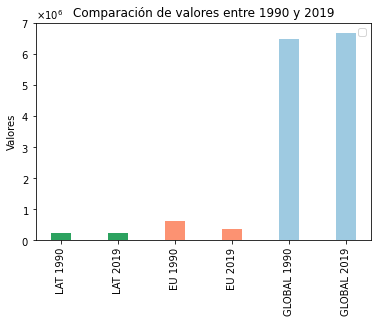

368006
639052


In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# Plot comparativo numero de muertes 2019
y_eu_1990 = 639052
y_eu_2019 = 368006

y_lat_1990 =  244306
y_lat_2019 =  234024

y_global_1990 = 6501226
y_global_2019 = 6671739

x_eu_1990 = "EU 1990"
x_eu_2019 = "EU 2019"

x_lat_1990 =  "LAT 1990"
x_lat_2019 =  "LAT 2019"

x_global_1990 = "GLOBAL 1990"
x_global_2019 = "GLOBAL 2019"




# Crear listas de datos
x_labels = [x_lat_1990,x_lat_2019, x_eu_1990,x_eu_2019, x_global_1990 ,x_global_2019]
y_values = [ y_lat_1990,y_lat_2019,y_eu_1990,y_eu_2019, y_global_1990,y_global_2019]  # 0 para dejar espacio entre grupos


# Crear gráfico de barras
fig, ax = plt.subplots()
bar_width = 0.35
colors = ['#2ca25f', '#2ca25f', '#fc9272', '#fc9272', '#9ecae1', '#9ecae1']
bar1 = ax.bar(x_labels, y_values, bar_width, color=colors)

# Configuración adicional
ax.set_ylabel('Valores')
ax.set_title('Comparación de valores entre 1990 y 2019')
ax.legend()
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# Mostrar el gráfico
plt.show()
print(y_eu_2019)
print(y_eu_1990)

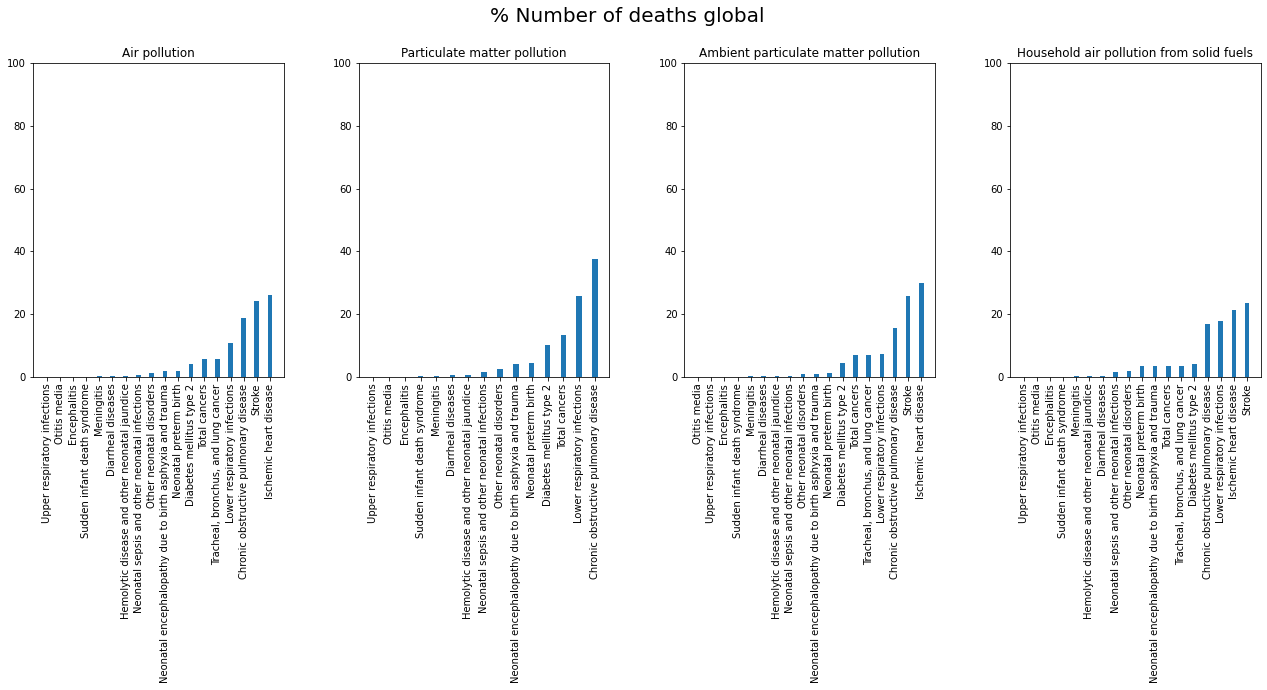

In [78]:
#Causas de muerte a nivel global segun el tipo de riesgo:contaminacion atmosferica
deaths_2019_air_polution = filtrado_2 (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause = "All causes", Age = "All ages", Sex= "Both sexes", Year= 2019)
deaths_2019_air_polution = deaths_2019_air_polution.sort_values(by='Value')
deaths_2019_air_polution_sum = deaths_2019_air_polution['Value'].sum()
deaths_2019_air_polution['porc'] = (deaths_2019_air_polution['Value'] /deaths_2019_air_polution_sum)*100

###
deaths_2019_apm = filtrado_2 (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause = "All causes", Age = "All ages", Sex= "Both sexes", Year= 2019)
deaths_2019_apm = deaths_2019_apm.sort_values(by='Value')
deaths_2019_apm_sum = deaths_2019_apm['Value'].sum()
deaths_2019_apm['porc'] = (deaths_2019_apm['Value'] /deaths_2019_apm_sum)*100

###
deaths_2019_pmTot = filtrado_2 (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Particulate matter pollution', Cause = "All causes", Age = "All ages", Sex= "Both sexes", Year= 2019)
deaths_2019_pmTot = deaths_2019_pmTot.sort_values(by='Value')
deaths_2019_pmTot_sum = deaths_2019_pmTot['Value'].sum()
deaths_2019_pmTot['porc'] = (deaths_2019_pmTot['Value'] /deaths_2019_pmTot_sum)*100
###
deaths_2019_house = filtrado_2 (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause = "All causes", Age = "All ages", Sex= "Both sexes", Year= 2019)
deaths_2019_house = deaths_2019_house.sort_values(by='Value')
deaths_2019_house_sum = deaths_2019_house['Value'].sum()
deaths_2019_house['porc'] = (deaths_2019_house['Value'] /deaths_2019_house_sum)*100
###
deaths_2019_ozone = filtrado_2 (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause = "All causes", Age = "All ages", Sex= "Both sexes", Year= 2019)
deaths_2019_ozone = deaths_2019_ozone.sort_values(by='Value')
deaths_2019_ozone_sum = deaths_2019_house['Value'].sum()
deaths_2019_ozone['porc'] = (deaths_2019_ozone['Value'] /deaths_2019_ozone_sum)*100
bar_width = 0.35
#colors = ['#2ca25f', '#2ca25f', '#fc9272', '#fc9272', '#9ecae1', '#9ecae1']

fig, ax = plt.subplots(1, 4, figsize=(22,6))#ancho y alto
plt.suptitle("% Number of deaths global", fontsize=20)
# Subplot 1
ax[0].bar( deaths_2019_air_polution['Cause'],deaths_2019_air_polution['porc'], bar_width)
ax[0].set_title('Air pollution')
#ax[0][0].xticks(rotation='vertical')

ax[1].bar( deaths_2019_pmTot['Cause'],deaths_2019_pmTot['porc'], bar_width)
ax[1].set_title('Particulate matter pollution')
#ax[0][1].xticks(rotation='vertical')

ax[2].bar( deaths_2019_apm['Cause'],deaths_2019_apm['porc'], bar_width)
ax[2].set_title('Ambient particulate matter pollution')
#ax[0][2].xticks(rotation='vertical')

ax[3].bar( deaths_2019_house['Cause'],deaths_2019_house['porc'], bar_width)
ax[3].set_title('Household air pollution from solid fuels')

# ax[1][0].bar( deaths_2019_ozone['Cause'],deaths_2019_ozone['Value'], bar_width)
# ax[1][0].set_title('Ambient ozone pollution')

# ax[1, 2].axis('off')
# ax[1, 1].axis('off')
# ax[1, 3].axis('off')

# # Configuración adicional
# ax.set_ylabel('Valores')
# ax.set_title('Numero de muertes global - Riesgo: Air pollution')
# ax.legend()
# plt.xticks(rotation='vertical')
ax[1].tick_params(axis='x', rotation=90)
ax[2].tick_params(axis='x', rotation=90)
ax[3].tick_params(axis='x', rotation=90)
ax[0].tick_params(axis='x', rotation=90)

ax[0].set_yticks(range(0, 110, 20))
ax[1].set_yticks(range(0, 110, 20))
ax[2].set_yticks(range(0, 110, 20))
ax[3].set_yticks(range(0, 110, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.85)
# Mostrar el gráfico
plt.show()


In [84]:
#% de muertes de contaminacion del aire
deaths_2019_air_polution_sum = deaths_2019_air_polution['Value'].sum()
death_mayores10 = deaths_2019_air_polution[deaths_2019_air_polution['porc']>10]
# Lower respiratory infections ==> 10.6% 
# Chronic obstructive pulmonary disease ==> 18.6%
# Stroke ==> 24.1%
# Ischemic heart disease ==> 26.1%}
death_mayores10["porc"].sum() #79.4%

79.39409045754704

In [88]:
#% de muertes de contaminacion del aire. PM Ambiental
deaths_2019_apm
deaths_2019_apm7 = deaths_2019_apm[deaths_2019_apm['porc']>7]
deaths_2019_apm7
# # Lower respiratory infections ==> 7.33% 
# # Chronic obstructive pulmonary disease ==> 15.6%
# # Stroke ==> 25.7%
# # Ischemic heart disease ==> 29.9%}
deaths_2019_apm7["porc"].sum() #78.6%

78.60402240675725

In [94]:
#% de muertes de contaminacion del aire house
deaths_2019_house
deaths_2019_house16 = deaths_2019_house[deaths_2019_house['porc']>16]
deaths_2019_house16
# # # Chronic obstructive pulmonary disease ==> 16.65%
# # # Lower respiratory infections ==> 17.66% 
# # # Ischemic heart disease ==> 21.35%}
# # # Stroke ==> 23.33%

deaths_2019_house16["porc"].sum() #78.99%

78.99632436587785

In [52]:
# Estadisticas por genero-edad - numero de muertes
Measure = "Deaths"
Metric = 'Number'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped = df_filtrado.groupby(['Age','Sex'])['Value'].sum().unstack()
# df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
df_filtrado_grouped.index
###############################

# Estadisticas por genero-edad - numero de muertes
Measure = "Deaths"
Metric = 'Rate'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado_rate = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_rate = df_filtrado_rate.groupby(['Age','Sex'])['Value'].sum().unstack()
df_filtrado_grouped_rate.index

Index(['0-4 years', '10-14 years', '15-19 years', '20-24 years', '25-29 years',
       '30-34 years', '35-39 years', '40-44 years', '45-49 years', '5-9 years',
       '50-54 years', '55-59 years', '60-64 years', '65-69 years',
       '70-74 years', '75-79 years', '80-84 years', '85-89 years',
       '90-94 years', '95+ years'],
      dtype='object', name='Age')

In [53]:
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped.index:
    df_filtrado_grouped.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped = df_filtrado_grouped.sort_values(by='index2') 

###################################################################
###################################################################
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped.index:
    df_filtrado_grouped_rate.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_rate.index:
    df_filtrado_grouped_rate.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_rate = df_filtrado_grouped_rate.sort_values(by='index2') 

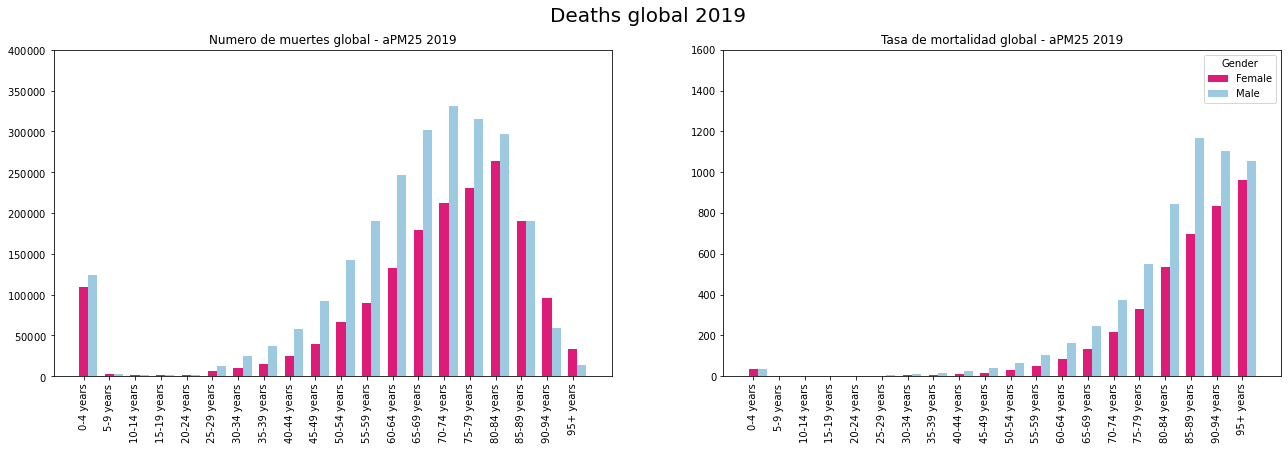

In [69]:
#Fig. 1. Age-specific numbers (bar plot) and rates (line plot) of deaths (A) and DALYs (B) attributable to ambient PM2.5 in 2019 by sex. DALY, disability-adjusted
#life year.
#Hacemos plot
# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(22,6))#ancho y alto
plt.suptitle("Deaths global 2019", fontsize=20)
bar_width = 0.35
bar_positions1 = range(len(df_filtrado_grouped['Female']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax[0].bar(df_filtrado_grouped.index, df_filtrado_grouped['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[0].bar(bar_positions2, df_filtrado_grouped['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')

ax[1].bar(df_filtrado_grouped_rate.index, df_filtrado_grouped_rate['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[1].bar(bar_positions2, df_filtrado_grouped_rate['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')


#Ticks x
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_yticks(range(0, 1800, 200))
ax[0].set_yticks(range(0, 450000, 50000))
ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# titulo subplots

ax[0].set_title('Numero de muertes global - aPM25 2019')
ax[1].set_title('Tasa de mortalidad global - aPM25 2019')
# Mostrar el gráfico
plt.legend(title="Gender")
plt.show()

In [121]:
# Estadisticas por genero-edad - numero de muertes
Measure = "DALYs"
Metric = 'Number'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado_dalys = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_dalys = df_filtrado_dalys.groupby(['Age','Sex'])['Value'].sum().unstack()
# df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
df_filtrado_grouped_dalys.index
###############################

# Estadisticas por genero-edad - numero de muertes
Measure = "DALYs"
Metric = 'Rate'
Risk = 'Ambient particulate matter pollution'
Cause = "All causes"
Year = 2019

df_filtrado_rate_dalys = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] != "All ages")& (data['Age'] != "70+ years")& (data['Sex'] != "Both sexes")& (data['Age'] != "Age-standardized")&(data['Cause'] == Cause)  & (data['Year'] == Year)]
# # Agrupar por país y causa, y sumar los valores
df_filtrado_grouped_rate_dalys = df_filtrado_rate_dalys.groupby(['Age','Sex'])['Value'].sum().unstack()
df_filtrado_grouped_rate_dalys.index



Index(['0-4 years', '10-14 years', '15-19 years', '20-24 years', '25-29 years',
       '30-34 years', '35-39 years', '40-44 years', '45-49 years', '5-9 years',
       '50-54 years', '55-59 years', '60-64 years', '65-69 years',
       '70-74 years', '75-79 years', '80-84 years', '85-89 years',
       '90-94 years', '95+ years'],
      dtype='object', name='Age')

In [123]:
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_dalys.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_dalys = df_filtrado_grouped_dalys.sort_values(by='index2') 

###################################################################
###################################################################
# Hay que ordenarlo segun el año, pero no esta ordenado.
# Alguna solucion mas sistematica que con los if??
if '0-4 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['0-4 years', 'index2'] = 1
    
if '5-9 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['5-9 years', 'index2'] = 2
if '10-14 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['10-14 years', 'index2'] = 3
    
if '15-19 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['15-19 years', 'index2'] = 4
    
if '20-24 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['20-24 years', 'index2'] = 5
if '25-29 years' in df_filtrado_grouped_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['25-29 years', 'index2'] = 6
    
    
if '30-34 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['30-34 years', 'index2'] = 7
    
if '35-39 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['35-39 years', 'index2'] = 8
if '40-44 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['40-44 years', 'index2'] = 9
    
if '45-49 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['45-49 years', 'index2'] = 10
    
if '50-54 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['50-54 years', 'index2'] = 11
if '55-59 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['55-59 years', 'index2'] = 12
    
    
if '60-64 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['60-64 years', 'index2'] = 13
    
if '65-69 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['65-69 years', 'index2'] = 14
if '70-74 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['70-74 years', 'index2'] = 15
    
if '75-79 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['75-79 years', 'index2'] = 16
    
if '80-84 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['80-84 years', 'index2'] = 17
if '85-89 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['85-89 years', 'index2'] = 18
    
if '90-94 years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['90-94 years', 'index2'] = 19
if '95+ years' in df_filtrado_grouped_rate_dalys.index:
    df_filtrado_grouped_rate_dalys.loc['95+ years', 'index2'] = 20  
    
df_filtrado_grouped_rate_dalys = df_filtrado_grouped_rate_dalys.sort_values(by='index2') 
df_filtrado_grouped_dalys


Sex,Female,Male,index2
Age,,,
0-4 years,9.654243e+06,1.103291e+07,1.0
5-9 years,1.715485e+05,1.698409e+05,2.0
10-14 years,8.530912e+04,8.913179e+04,3.0
15-19 years,6.443835e+04,7.496377e+04,4.0
20-24 years,6.679016e+04,8.081860e+04,5.0
25-29 years,5.412320e+05,9.361096e+05,6.0
30-34 years,7.714627e+05,1.586881e+06,7.0
35-39 years,1.010487e+06,2.166024e+06,8.0
40-44 years,1.444058e+06,3.039130e+06,9.0


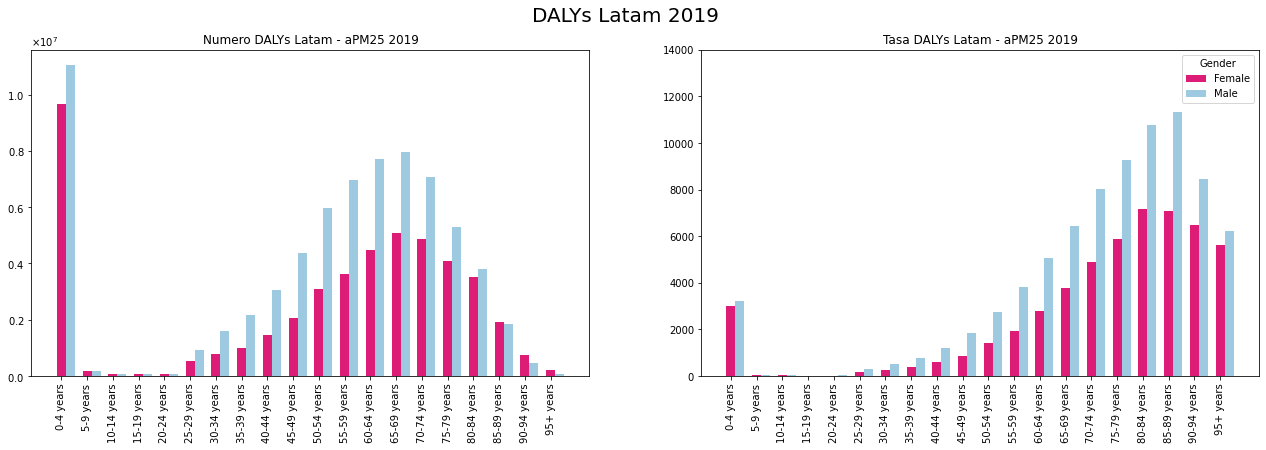

In [125]:
#Fig. 1. Age-specific numbers (bar plot) and rates (line plot) of deaths (A) and DALYs (B) attributable to ambient PM2.5 in 2019 by sex. DALY, disability-adjusted
#life year.
#Hacemos plot
# Gráfico de barras
fig, ax = plt.subplots(1, 2, figsize=(22,6))#ancho y alto
plt.suptitle("DALYs global 2019", fontsize=20)
bar_width = 0.35
bar_positions1 = range(len(df_filtrado_grouped_dalys['Female']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

ax[0].bar(df_filtrado_grouped_dalys.index, df_filtrado_grouped_dalys['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[0].bar(bar_positions2, df_filtrado_grouped_dalys['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')

ax[1].bar(df_filtrado_grouped_rate_dalys.index, df_filtrado_grouped_rate_dalys['Female'], width=bar_width, label='Female',color="#dd1c77")
ax[1].bar(bar_positions2, df_filtrado_grouped_rate_dalys['Male'], width=bar_width, label='Male',color="#9ecae1")
#ax[0].set_title('Air pollution')


#Ticks x
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_yticks(range(0, 15000, 2000))
ax[0].set_yticks(range(0, 10000000, 500000))
ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
# titulo subplots

ax[0].set_title('Numero DALYs global - aPM25 2019')
ax[1].set_title('Tasa DALYs global - aPM25 2019')
# Mostrar el gráfico
plt.legend(title="Gender")
plt.show()